<a href="https://colab.research.google.com/github/cramirez98/ProyectoAprendizajeAutomatico/blob/main/AprendizajeAutomaticoProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARGAR DATOS NECESARIOS**
---
---
Se clona el repositorio de Github donde se almacena el set de datos y la lista de paquetes a instalar

Se carga la libreria de googledrive y se autentica

In [1]:
install.packages("googledrive")
install.packages("httpuv")
library(googledrive)
library(httpuv)

if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py"))
{
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("googledrive"):
“installation of package ‘googledrive’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘promises’, ‘later’


Warning message in install.packages("httpuv"):
“installation of package ‘later’ had non-zero exit status”
Warning message in install.packages("httpuv"):
“installation of package ‘promises’ had non-zero exit status”
Warning message in install.packages("httpuv"):
“installation of package ‘httpuv’ had non-zero exit status”


ERROR: ignored

In [2]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWjfwSry9LuogLOftN2rMF8Qtp1W0CA2hMifxVghY_bYNVCBEfQ8rbQ


Clonacion del repositorio y instalacion de los paquetes

In [2]:
system2(command = "git", 
        args    = c("clone", "https://github.com/cramirez98/ProyectoAprendizajeAutomatico.git"), 
        stdout  = T)

character(0)

In [3]:
system2(command = "python3", 
        args    = c("ProyectoAprendizajeAutomatico/util/paquetes.py"), 
        stdout  = T)

[1] "La lista de paquetes se cargo correctamente"

In [4]:
system2(command = "Rscript", 
        args    = c("ProyectoAprendizajeAutomatico/util/package_installer.R", "base"))

In [5]:
package_list <- read.csv("paquetes.csv", header= T)$BASE
lapply(package_list, require, character.only = TRUE)
library(tools)

Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: ggthemes

Loading required package: knitr

Loading required package: openxlsx

Loading required package: DataExplorer

Loading required package: class

Loading required package: visdat

Loading required package: ggvis

Loading required package: GGally

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:ggvis’:

    resolution


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: fastDummies

Loading required package: gridExtra

Loading required package: ROCR

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: reshape2

Loading required package: devtools

Loading required package: usethis

Loading required package: tidyverse

Warning mes

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

In [6]:
system2(command = "mkdir", 
        args    = c("Graficas"), 
        stdout  = T)

character(0)

In [7]:
system2(command = "mkdir", 
        args    = c("Modelos"), 
        stdout  = T)

character(0)

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

---
---

In [9]:
data <- read.xlsx("ProyectoAprendizajeAutomatico/Dataset/Dry_Bean_Dataset.xlsx")
head(data)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
2,28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
3,29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
4,30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
5,30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
6,30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


In [10]:
data$Class <- as.factor(data$Class)

## Busqueda de datos faltantes

---

Se puede observar que el set de datos no posee valores faltantes en ninguna de las columnas

In [ ]:
datos_faltanes <- data %>% lapply(function(x) sum(is.na(x))) %>%
                            as.data.frame %>%
                            t
colnames(datos_faltanes) <- 'Datos Faltantes'
datos_faltanes

,Datos Faltantes
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


## Analisis del balance del set de datos


---


Se realiza el conteo y la proporción de las observaciones que pertenecen a cada una de las 7 clases de frijoles, donde se puede concluir que el set de datos no está balanceado, puesto que no todas las clases de frijoles poseen la misma proporción de observaciones. Lo anterior se puede justificar al observar como la proporción de observaciones para la clase Bombay es de tan solo el 3% del set de datos, en comparación a la proporción de observaciones para la clase Dermason, la cual es del 26.05%. Lo anterior nos permite suponer que en término de los modelos que se construirán, estos van a estar mejor entrenados para poder clasificar correctamente frijoles de la clase Dermason, puesto que como se explicó, el set de datos presenta una alta proporción de las observaciones para este tipo de frijol.

In [ ]:
proporcion <- data %>% count(Class) %>%
              mutate('Proporcion' = round((n / sum(n))*100,2))
proporcion

Class,n,Proporcion
<fct>,<int>,<dbl>
BARBUNYA,1322,9.71
BOMBAY,522,3.84
CALI,1630,11.98
DERMASON,3546,26.05
HOROZ,1928,14.17
SEKER,2027,14.89
SIRA,2636,19.37


Saving 6.67 x 6.67 in image



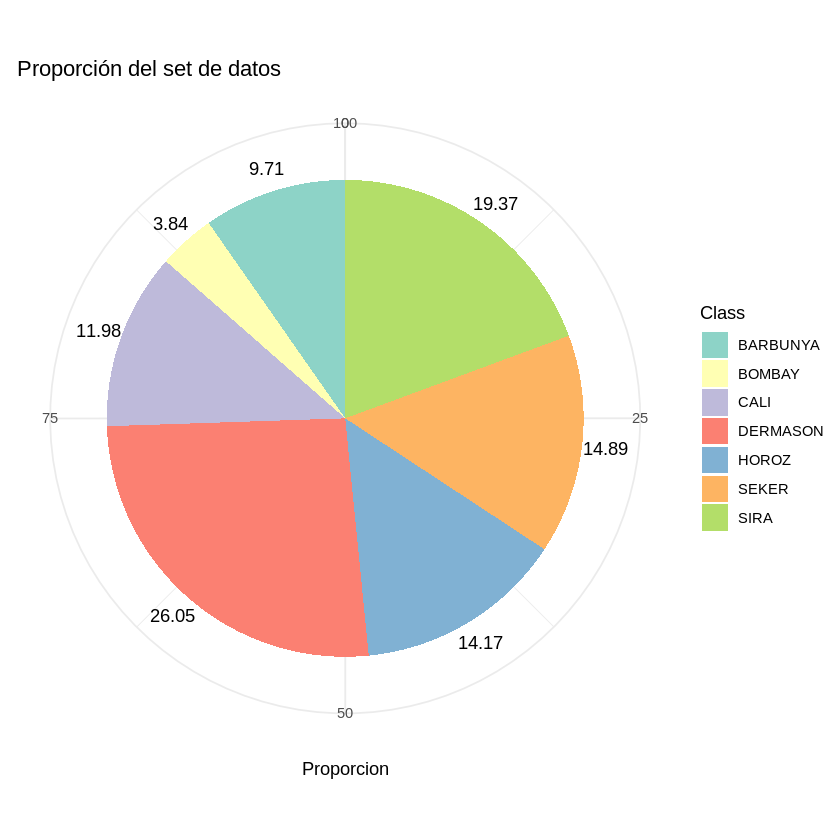

In [ ]:
data2 <- proporcion %>% 
  arrange(desc(Class)) %>%
  mutate(ypos = cumsum(Proporcion)- 0.5*Proporcion )

ggplot(data2, aes(x="", y=Proporcion, fill=Class))+ 
    geom_bar(width = 0.5,stat ="identity")+
    coord_polar(theta = "y",direction = 1)+
    geom_text(aes(x=1.3,y = Proporcion, label = Proporcion), position = position_stack(vjust = 0.5)) + 
    scale_fill_brewer(palette="Set3")+ggtitle("Proporción del set de datos")+theme_minimal() +
    labs(x = NULL)
ggsave("Graficas/ProporcionDataset.pdf")

## Estructura del set de datos
---
Se puede observar como todos los atributos de los frijoles son variables cuantitativas, siendo la Clase la única variable no numérica, donde está es una variable cualitativa nominal.
Por otro lado, visualiza como el set de datos posee 17 variables y un total de 13611 observaciones.

In [ ]:
str(data)

'data.frame':	13611 obs. of  17 variables:
 $ Area           : num  28395 28734 29380 30008 30140 ...
 $ Perimeter      : num  610 638 624 646 620 ...
 $ MajorAxisLength: num  208 201 213 211 202 ...
 $ MinorAxisLength: num  174 183 176 183 190 ...
 $ AspectRation   : num  1.2 1.1 1.21 1.15 1.06 ...
 $ Eccentricity   : num  0.55 0.412 0.563 0.499 0.334 ...
 $ ConvexArea     : num  28715 29172 29690 30724 30417 ...
 $ EquivDiameter  : num  190 191 193 195 196 ...
 $ Extent         : num  0.764 0.784 0.778 0.783 0.773 ...
 $ Solidity       : num  0.989 0.985 0.99 0.977 0.991 ...
 $ roundness      : num  0.958 0.887 0.948 0.904 0.985 ...
 $ Compactness    : num  0.913 0.954 0.909 0.928 0.971 ...
 $ ShapeFactor1   : num  0.00733 0.00698 0.00724 0.00702 0.0067 ...
 $ ShapeFactor2   : num  0.00315 0.00356 0.00305 0.00321 0.00366 ...
 $ ShapeFactor3   : num  0.834 0.91 0.826 0.862 0.942 ...
 $ ShapeFactor4   : num  0.999 0.998 0.999 0.994 0.999 ...
 $ Class          : Factor w/ 7 levels "BARB

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Saving 6.67 x 6.67 in image



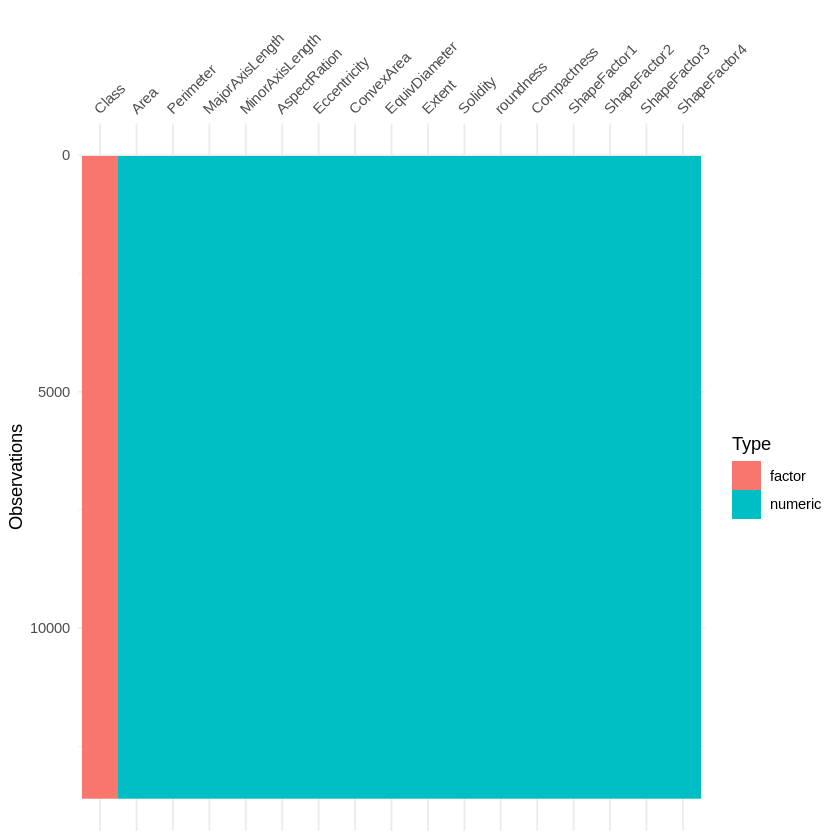

In [ ]:
data %>% 
  vis_dat()
ggsave("Graficas/DiagramaTipoDeDato.pdf")

## Resumen de parametros estadisticos
---
Al observar el resumen de los parametros estadisticos de cada variables, se puede exponer que la escala de los diferentes atributos de los frijoles son muy diferentes entre si, donde esto se puede concluir al observar los valores de los maximos y minimos de cada atributo. El atributo con los valores mas grandes es el de Area con un valor maximo de 254416 y el atributo con los valores mas reducidos es el de ShapeFactor2. Debido a lo expuesto anteriormente es necesario el normalizar el set de datos para poder ser utilizado en la etapa de generacion de modelos.

In [ ]:
do.call(cbind, lapply(data[,-17], summary))

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Min.,20420.00,524.7360,183.6012,122.5127,1.024868,0.2189513,20684.0,161.2438,0.5553147,0.9192462,0.4896183,0.6405768,0.002778013,0.000564169,0.4103386,0.9476874
1st Qu.,36328.00,703.5235,253.3036,175.8482,1.432307,0.7159277,36714.5,215.0680,0.7186335,0.9856704,0.8320963,0.7624687,0.005899917,0.001153520,0.5813586,0.9937029
Median,44652.00,794.9410,296.8834,192.4317,1.551124,0.7644408,45178.0,238.4380,0.7598589,0.9882830,0.8831573,0.8012767,0.006645174,0.001693531,0.6420443,0.9963859
Mean,53048.28,855.2835,320.1419,202.2707,1.583242,0.7508949,53768.2,253.0642,0.7497328,0.9871428,0.8732818,0.7998637,0.006563609,0.001715947,0.6435902,0.9950633
3rd Qu.,61332.00,977.2130,376.4950,217.0317,1.707109,0.8104660,62294.0,279.4465,0.7868515,0.9900131,0.9168688,0.8342699,0.007271420,0.002170268,0.6960063,0.9978825
Max.,254616.00,1985.3700,738.8602,460.1985,2.430306,0.9114230,263261.0,569.3744,0.8661946,0.9946775,0.9906854,0.9873030,0.010451169,0.003664972,0.9747672,0.9997325


## Distribución de los atributos
---
Se realiza el gráfico de densidad para cada atributo de cada uno de los 7 frijoles, donde es posible observar como el tipo de frijol cuyos atributos permiten que este se diferencia más respecto a los demás es precisamente el frijol tipo Bombay, donde esto se puede justificar al observar como en la mayoría de los casos, las distribuciones de sus atributos se encuentran alejadas de las distribuciones de los atributos de los demás tipos de frijoles. Por otro lado, también se puede destacar como para el caso de los atributos ShapeFactor4 y Solidify, las distribuciones se solapan mucho entre sí, siendo muy difícil discernir entre los diferentes tipos de frijol, causando que estas variables no permitan separar los tipos de frijol.

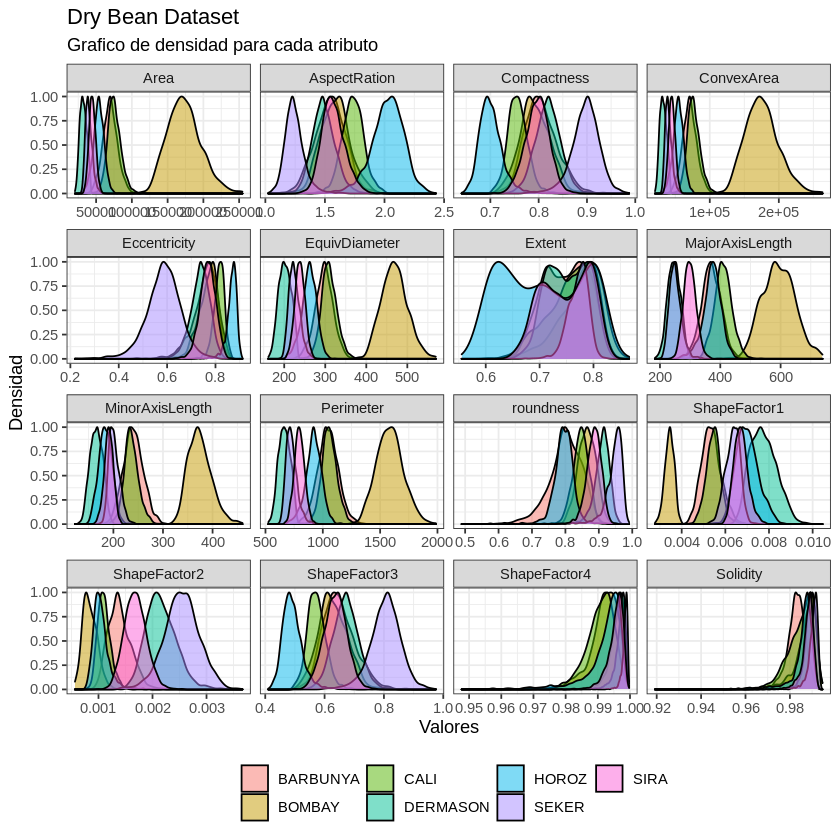

In [ ]:
data %>%
  gather(Attributes, value, 1:16) %>%
  ggplot(aes(x=value, fill=Class, ..scaled..)) +
  geom_density(colour="black", alpha=0.5) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Valores", y="Densidad",
       title="Dry Bean Dataset",
       subtitle="Grafico de densidad para cada atributo") +
  theme_bw() +
  theme(legend.position="bottom",
        legend.title=element_blank())

ggsave("Graficas/DiagramasDensidad.pdf",
       width = 3000,
       height = 1700,
       units = 'px')

## Diagramas de caja
---

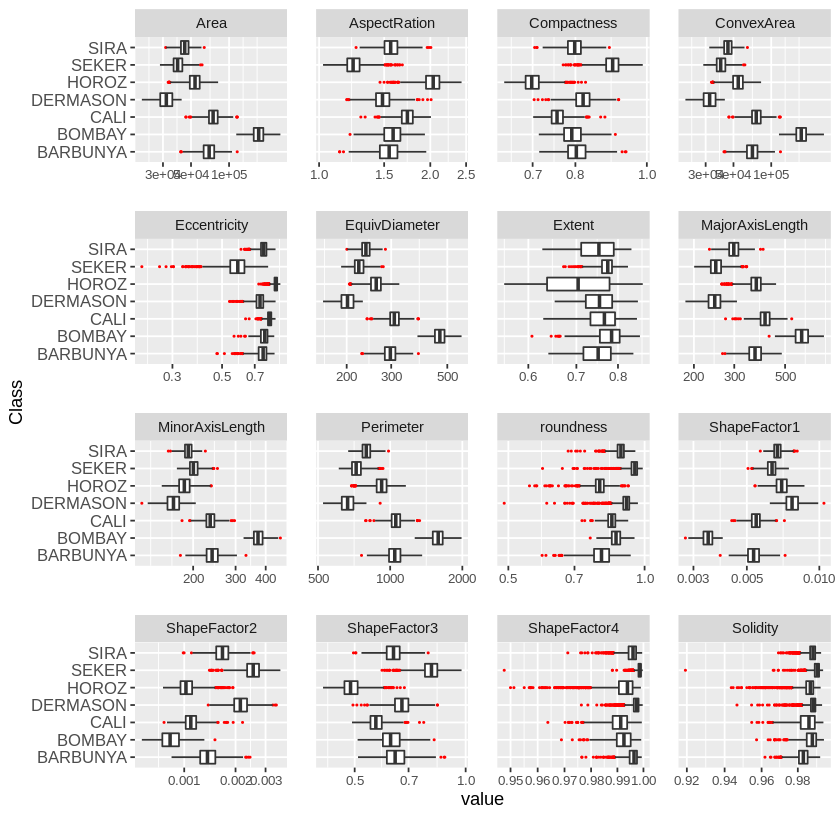

In [ ]:
plot_boxplot(data, by = "Class", scale_y = "log10", nrow = 4L,
             geom_boxplot_args = list("outlier.color" = "red", 'coef' = 2, 'outlier.size' = 0.2),
             theme_config = list(text = element_text(size=11),
                                 axis.text.y = element_text(size = 10),
                                 axis.text.x = element_text(size = 8),
                                 panel.spacing = unit(1.2, "lines"))
            )
  ggsave("Graficas/DiagramasDeCaja.pdf",
       width = 3000,
       height = 1900,
       units = 'px')

## Análisis de correlación
---
Se realiza el diagrama de correlación entre los 16 atributos de los frijoles, donde es posible destacar el hecho de que varios atributos estén fuertemente correlacionados entre sí, lo cual es de esperarse debido a que todos los atributos ayudan a describir la forma del frijol y existen atributos que están construidos con base en otros atributos. El hecho de que muchos atributos se encuentren muy correlacionados entre sí, nos permite concluir que es muy probable que muchos de estos atributos se puedan empaquetar en un solo componente al efectuar un subsecuente análisis de componente principales, para de esta manera, reducir la dimensionalidad del set de datos.

In [ ]:
pdf("Graficas/DiagramaCorrelacion.pdf")
corrplot.mixed(cor(data[,-17]), lower = 'ellipse', upper = 'number', tl.pos = "lt", diag = "l", number.cex=0.65)
dev.off()

png 
  2

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image



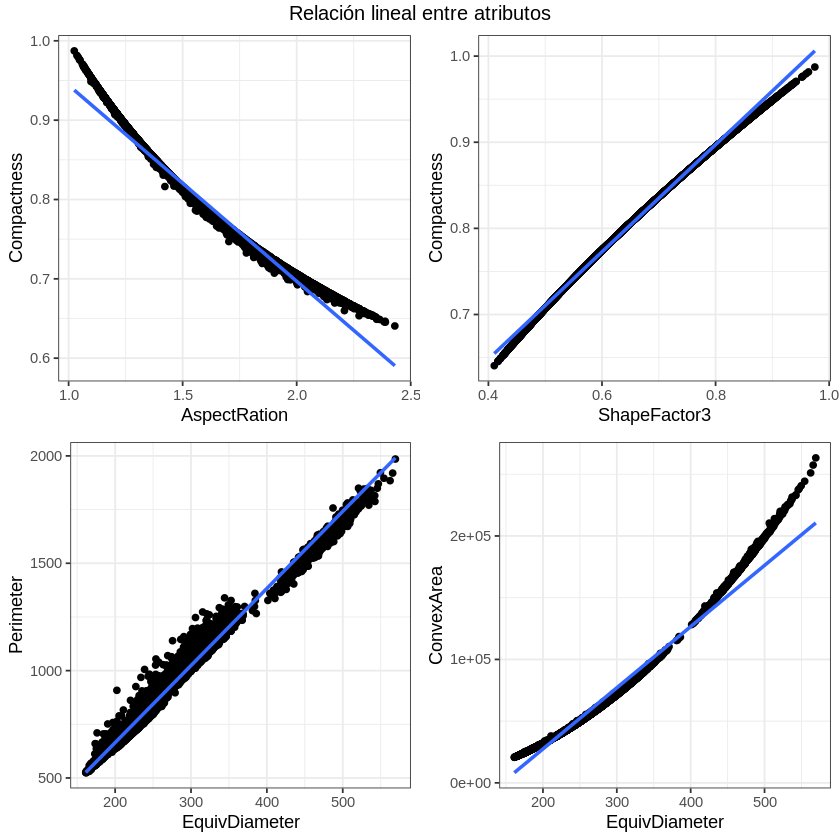

In [ ]:
disp1 <- ggplot(data, aes(x=AspectRation, y=Compactness)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  theme_bw()

disp2 <- ggplot(data, aes(x=ShapeFactor3, y=Compactness)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  theme_bw()

disp3 <- ggplot(data, aes(x=EquivDiameter, y=Perimeter)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  theme_bw()

disp4 <- ggplot(data, aes(x=EquivDiameter, y=ConvexArea)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  theme_bw()
grid.arrange(disp1, disp2, disp3, disp4, nrow = 2, top = "Relación lineal entre atributos") 
g <- arrangeGrob(disp1, disp2, disp3, disp4, nrow = 2, top = "Relación lineal entre atributos") 
ggsave(file = "Graficas/DiagramasDeDispersion.pdf", g)

## Analisis de componentes principales

In [ ]:
pca <- prcomp(data[,-17], center = TRUE,scale = TRUE)

In [ ]:
pca$x[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
1,-4.981378,1.824630,0.7489935,0.39079730,-0.03353009
2,-5.436593,2.932257,2.1822938,0.43194367,1.22641911
3,-4.757914,1.826817,0.5140187,0.12584918,0.13150071
4,-4.300383,2.003588,3.5543165,-0.08296145,0.80073622
5,-6.349107,4.088055,1.1791560,0.83032667,-0.03707139


In [ ]:
pca_table <- (pca %>% summary())$importance %>% 
             t() %>% as.data.frame() %>% 
             dplyr::rename(CumulativeProportion = "Cumulative Proportion", ProportionOfVariance = "Proportion of Variance")
pca_table

,Standard deviation,ProportionOfVariance,CumulativeProportion
,<dbl>,<dbl>,<dbl>
PC1,2.979031752,0.55466,0.55466
PC2,2.056442489,0.26431,0.81897
PC3,1.131834916,0.08007,0.89904
PC4,0.904573295,0.05114,0.95018
PC5,0.662032374,0.02739,0.97757
PC6,0.428907625,0.01150,0.98907
PC7,0.334101957,0.00698,0.99605
PC8,0.228064026,0.00325,0.99930
PC9,0.090885983,0.00052,0.99981


Saving 6.67 x 6.67 in image



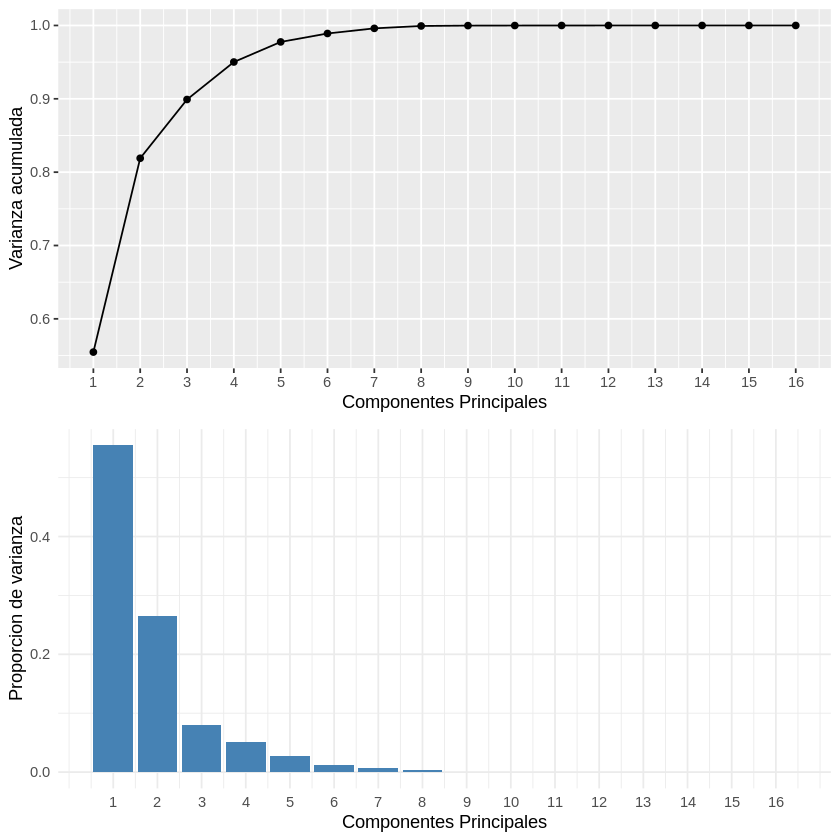

In [ ]:
p1 <- ggplot(data=pca_table, aes(x=1:nrow(pca_table), y=CumulativeProportion, group=1)) +
  geom_line()+
  geom_point()+
  labs(x="Componentes Principales", y = "Varianza acumulada")+
  scale_x_continuous(breaks = round(seq(1, 16, by = 1),1)) 

p2 <- ggplot(data=pca_table, aes(x=1:16, y=ProportionOfVariance)) +
  geom_bar(stat="identity", fill="steelblue")+
  theme_minimal()+
  labs(x="Componentes Principales", y = "Proporcion de varianza")+
  scale_x_continuous(breaks = round(seq(1, 16, by = 1),1)) 
grid.arrange(p1, p2, nrow = 2)

g <- arrangeGrob(p1, p2, nrow = 2, top = "PCA") 
ggsave(file = "Graficas/DiagramaPCA.pdf", g)

## Guardar todas las figuras en google drive
---

In [ ]:
library(utils)
for(graph in list.files(path = 'Graficas/', full.names = T)){
  drive_upload(graph, path = paste0('AprendizajeAutomatico/GraficasGeneradas/', basename(graph)), overwrite = T)
}

Local file:

• Graficas//DiagramaPCA.pdf

Uploaded into Drive file:

• DiagramaPCA.pdf <id: 17MyWbY1RsVXPRW1gjUIX5r5YizlSVkN2>

With MIME type:

• application/pdf

Local file:

• Graficas//DiagramasDeCaja.pdf

Uploaded into Drive file:

• DiagramasDeCaja.pdf <id: 1QsuyDWwRZDlUV1IS_JpyT1FxIKjesJy0>

With MIME type:

• application/pdf

Local file:

• Graficas//DiagramasDeDispersion.pdf

Uploaded into Drive file:

• DiagramasDeDispersion.pdf <id: 1G4XFDdQyPEtdPX3Wpaig1Rzf32wgNp3I>

With MIME type:

• application/pdf

Local file:

• Graficas//DiagramasDensidad.pdf

Uploaded into Drive file:

• DiagramasDensidad.pdf <id: 1-zjLsZuHLmPDHooT-gUSdJJ36lZ_p1cI>

With MIME type:

• application/pdf

Local file:

• Graficas//DiagramaTipoDeDato.pdf

Uploaded into Drive file:

• DiagramaTipoDeDato.pdf <id: 1gcNHtiVej6pDBPm9b99BOpr7pjYDbUbD>

With MIME type:

• application/pdf

Local file:

• Graficas//ProporcionDataset.pdf

Uploaded into Drive file:

• ProporcionDataset.pdf <id: 1zUEQOYCToYFoHwSTTq6G2

# **MODELADO**
----
----

## Instalar y cargar librerias necesarias
---

In [8]:
library(tictoc)

In [9]:
system2(command = "Rscript", 
        args    = c("ProyectoAprendizajeAutomatico/util/package_installer.R", "modelado"))

In [10]:
package_list <- read.csv("paquetes.csv", header= T)$MODELADO
lapply(package_list, require, character.only = TRUE)
library(tools)

Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: Metrics


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall


The following object is masked from ‘package:pROC’:

    auc


Loading required package: randomForest

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: gbm

Loaded gbm 2.1.8

Loading required package: glmnet

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


The following object is masked from 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] FALSE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] FALSE

[[15]]
[1] FALSE

[[16]]
[1] FALSE

## Cargar coordenadas del analisis de componentes principales

In [11]:
data_pca <- read.csv(file = 'ProyectoAprendizajeAutomatico/Dataset/data_pca.csv') %>% dplyr::select(2:7)
colnames(data_pca) <- c("PC1","PC2","PC3", 'PC4', 'PC5', 'Class')
data_pca$Class <- as.factor(data_pca$Class)

In [ ]:
head(data_pca)

,PC1,PC2,PC3,PC4,PC5,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-4.981561,1.824697,-0.7490210,-0.3908117,0.03353132,SEKER
2,-5.436792,2.932365,-2.1823740,-0.4319595,-1.22646417,SEKER
3,-4.758088,1.826884,-0.5140376,-0.1258538,-0.13150554,SEKER
4,-4.300541,2.003661,-3.5544471,0.0829645,-0.80076563,SEKER
5,-6.349340,4.088205,-1.1791994,-0.8303572,0.03707275,SEKER
6,-4.946479,2.339735,-0.7171719,-0.3311548,-0.27107709,SEKER


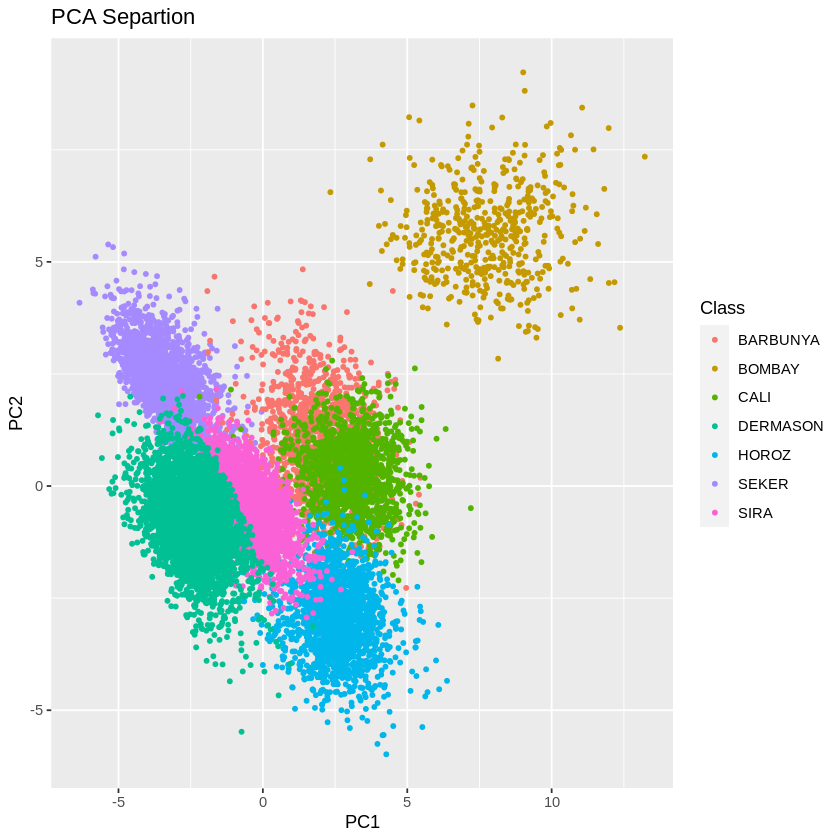

In [ ]:
data_pca %>% 
  ggplot(aes(x = PC1, y = PC2, colour = Class)) +
  geom_point(size = 1) +
  labs(title = "PCA Separtion")

## Creación de las particiones

In [12]:
set.seed(998)
inTraining <- createDataPartition(data_pca$Class, p = .80, list = FALSE)
training <- data_pca[ inTraining,]
testing  <- data_pca[-inTraining,]

## K-Means
---

### Cargar Modelo

In [ ]:
drive_download(
  "AprendizajeAutomatico/ModelosGenerados/KMeansModels.rds",
  path = "Modelos/KMeansModels.rds",
  overwrite = TRUE
)
kmeans_models <- readRDS(file = 'Modelos/KMeansModels.rds')

File downloaded:

• KMeansModels.rds <id: 1-rq7PCpTAaO67GAWGgLK8ThqjELqosBM>

Saved locally as:

• Modelos/KMeansModels.rds



### Creacion del modelo

In [ ]:
kmeans_models <- 1:25 %>% map(function(n_cluster) kmeans(data_pca[,1:5], centers = n_cluster, nstart=15, iter.max = 50))         

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 680550)”


### Visualización del modelo

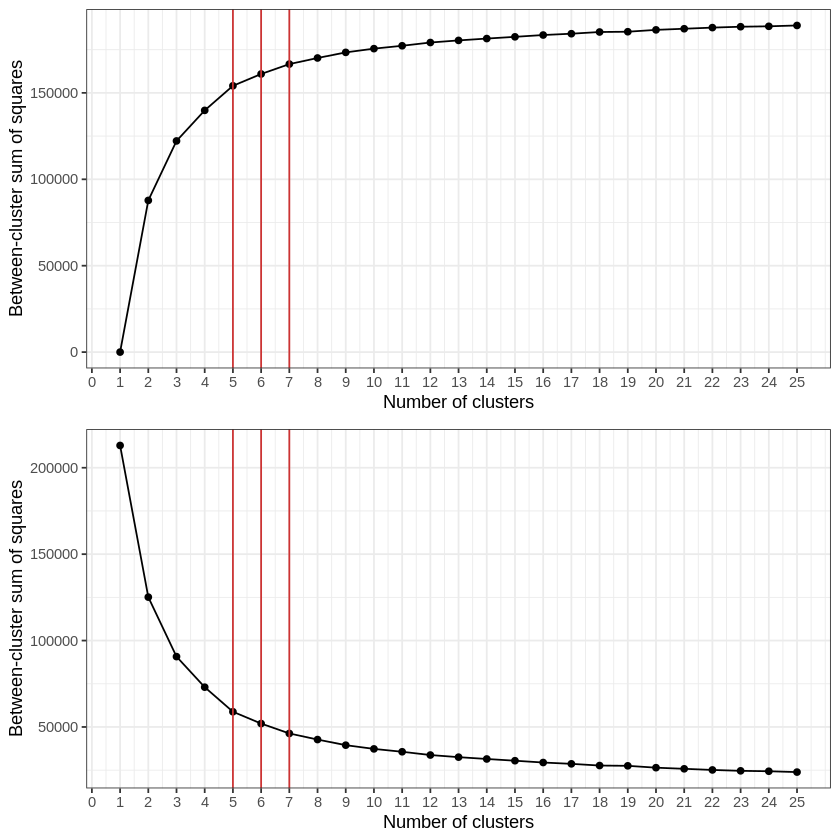

In [ ]:
p1 <- qplot(1:25, kmeans_models %>% map_dbl(function(x) x$betweenss), geom=c("point", "line"), 
            xlab="Number of clusters", ylab="Between-cluster sum of squares") +
            geom_vline(xintercept = 5:7, colour = 'brown3') +
  scale_x_continuous(breaks=seq(0, 25, 1)) +
  theme_bw()

p2 <- qplot(1:25, kmeans_models %>% map_dbl(function(x) x$tot.withinss), geom=c("point", "line"), 
            xlab="Number of clusters", ylab="Between-cluster sum of squares") +
            geom_vline(xintercept = 5:7, colour = 'brown3') +
  scale_x_continuous(breaks=seq(0, 25, 1)) +
  theme_bw()
grid.arrange(p1, p2, ncol=1)

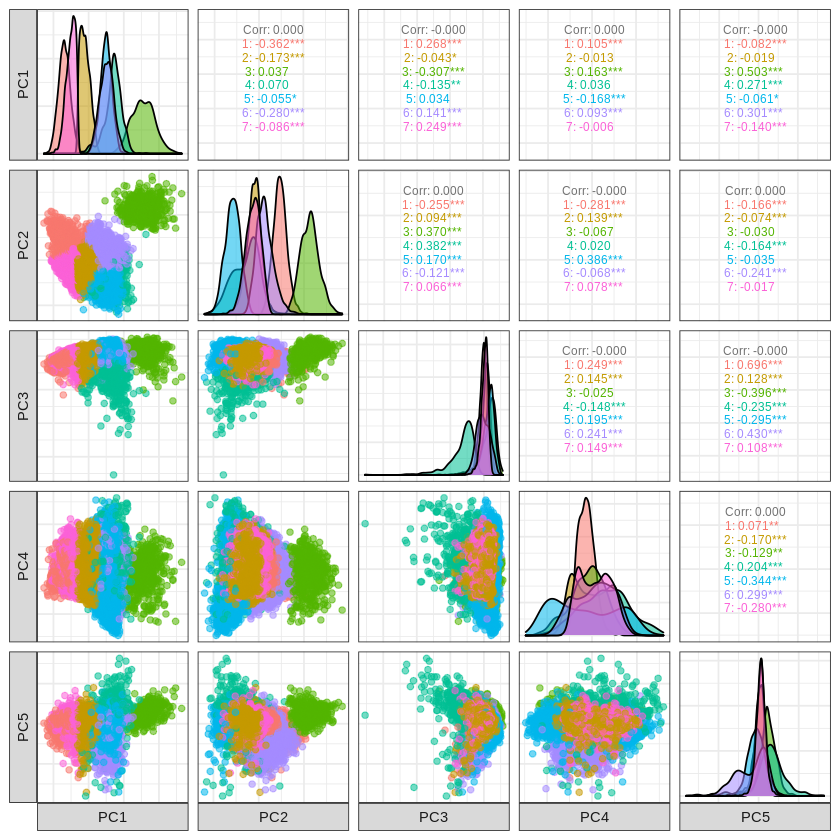

In [ ]:
ggpairs(cbind(data_pca[,1:6], Cluster=as.factor(kmeans_models[[7]]$cluster)),
        columns=1:5, aes(colour=Cluster, alpha=0.5),
        lower=list(continuous="points"),
        upper=list(continuous=wrap("cor", size = 2.5)),
        axisLabels="none", switch="both") +
        labs(fill = "Class")+
        theme_bw() +
  theme(legend.position="bottom")

### Guardar modelos

In [ ]:
filename <- 'Modelos/KMeansModels.rds'
saveRDS(clusters, file = filename)
drive_upload(filename, path = paste0('AprendizajeAutomatico/ModelosGenerados/', basename(filename)), overwrite = T)

File trashed:

• KMeansModels.rds <id: 1FZ7tIeb_DXofq8nToORcwcttQsV4BYdt>

Local file:

• Modelos/KMeansModels.rds

Uploaded into Drive file:

• KMeansModels.rds <id: 1-rq7PCpTAaO67GAWGgLK8ThqjELqosBM>

With MIME type:

• application/x-gzip



## K-NN
---

In [ ]:
data_pca[,1:5]

## Naive Bayes
---

### Cargar Modelo

In [ ]:
dir <- 'AprendizajeAutomatico/ModelosGenerados/NaiveBayesModel.rds'
drive_download(
  dir,
  path = paste0('Modelos/', basename(dir)),
  overwrite = TRUE
)
naivebayes <- readRDS(file = paste0('Modelos/', basename(dir)))

File downloaded:

• NaiveBayesModel.rds <id: 1oVnxfLvUszOkAaLcIBmfime4zGuArtS6>

Saved locally as:

• Modelos/NaiveBayesModel.rds



### Creación del modelo

In [ ]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 5)

In [ ]:
tic('Tiempo de entrenamiento')
naivebayes <- caret::train(Class~., data = training, 
                 method = "nb", 
                 trControl = fitControl, 
                 metric = 'Kappa',
                 tuneGrid = data.frame(fL=c(0.5,0.75,1,1.5), usekernel = TRUE, adjust=c(1,1.2,1.3,1.4)))
toc()
naivebayes

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 533”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 534”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 543”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 594”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 812”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 504”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 534”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 543”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 594”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 812”


Tiempo de entrenamiento: 279.587 sec elapsed


Naive Bayes 

10891 samples
    5 predictor
    7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 9803, 9801, 9803, 9803, 9802, 9802, ... 
Resampling results across tuning parameters:

  fL    adjust  Accuracy   Kappa    
  0.50  1.0     0.8917260  0.8690586
  0.75  1.2     0.8924787  0.8699588
  1.00  1.3     0.8925154  0.8700023
  1.50  1.4     0.8928461  0.8703963

Tuning parameter 'usekernel' was held constant at a value of TRUE
Kappa was used to select the optimal model using the largest value.
The final values used for the model were fL = 1.5, usekernel = TRUE and
 adjust = 1.4.

### Métricas

In [ ]:
predictions<- predict(naivebayes,testing)
naivebayes_metrics <- cbind(testing,predictions)

Naive Bayes 

13611 samples
    5 predictor
    7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 12251, 12252, 12251, 12250, 12250, 12248, ... 
Resampling results across tuning parameters:

  fL    adjust  Accuracy   Kappa    
  0.50  1.0     0.8933218  0.8709843
  0.75  1.2     0.8942914  0.8721506
  1.00  1.3     0.8944531  0.8723469
  1.50  1.4     0.8946441  0.8725775

Tuning parameter 'usekernel' was held constant at a value of TRUE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 1.5, usekernel = TRUE and
 adjust = 1.4.

In [ ]:
confusionMatrix<- confusionMatrix(naivebayes_metrics$predictions,naivebayes_metrics$Class, mode = "prec_recall")
confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA     1172      0   26        8     4    29   18
  BOMBAY          0    522    0        0     0     0    0
  CALI           75      0 1526        0    37     0   12
  DERMASON        0      0    0     3114     6    91  349
  HOROZ          10      0   31       28  1848     1   69
  SEKER           9      0    2      104     0  1850   17
  SIRA           56      0   45      292    33    56 2171

Overall Statistics
                                          
               Accuracy : 0.8966          
                 95% CI : (0.8913, 0.9016)
    No Information Rate : 0.2605          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8749          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: BARBUNYA Class: BOMBAY Cl

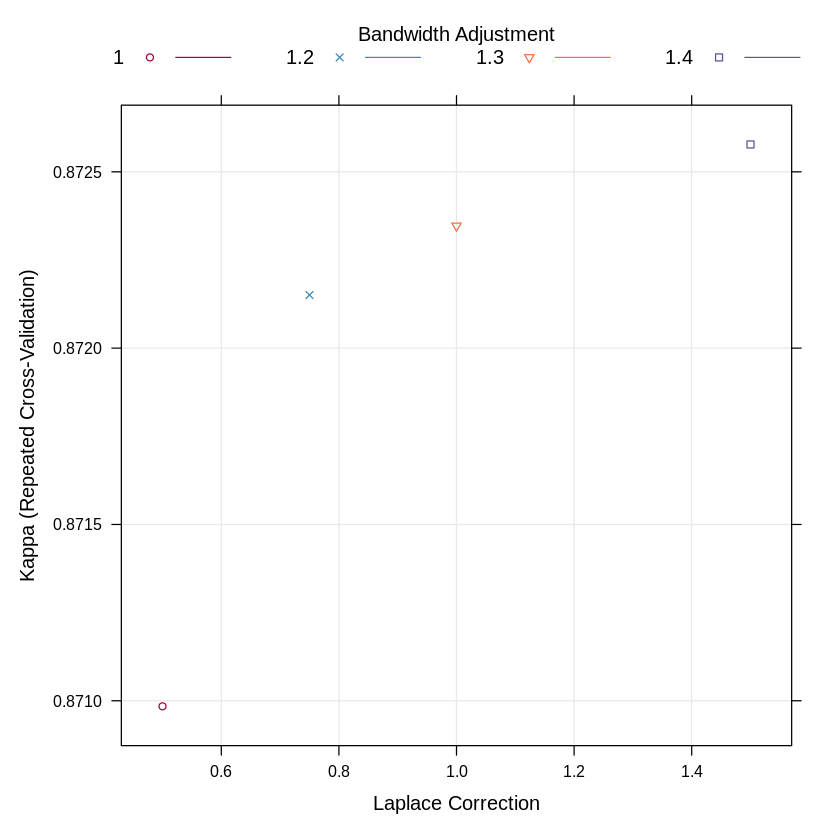

In [ ]:
trellis.par.set(caretTheme())
plot(naivebayes, metric = "Kappa")

In [ ]:
as.data.frame.matrix(confusionMatrix$byClass)
as.data.frame.matrix(confusionMatrix$byClass) %>% dplyr::summarise(across(Sensitivity:'Detection Rate', ~ mean(.x, na.rm = TRUE))) %>% 
                                                  dplyr::mutate(Accuracy = confusionMatrix$overall["Accuracy"],
                                                                Kappa = confusionMatrix$overall["Kappa"])

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Class: BARBUNYA,0.8865356,0.9930832,0.9323787,0.9878582,0.9323787,0.8865356,0.9088794,0.09712732,0.08610683,0.09235177,0.9398094
Class: BOMBAY,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,0.03835133,0.03835133,0.03835133,1.0000000
Class: CALI,0.9361963,0.9896503,0.9248485,0.9913051,0.9248485,0.9361963,0.9304878,0.11975608,0.11211520,0.12122548,0.9629233
Class: DERMASON,0.8781726,0.9556880,0.8747191,0.9570192,0.8747191,0.8781726,0.8764424,0.26052458,0.22878554,0.26155316,0.9169303
Class: HOROZ,0.9585062,0.9881024,0.9300453,0.9931177,0.9300453,0.9585062,0.9440613,0.14165014,0.13577254,0.14598487,0.9733043
Class: SEKER,0.9126788,0.9886050,0.9334006,0.9847794,0.9334006,0.9126788,0.9229234,0.14892366,0.13591948,0.14561752,0.9506419
Class: SIRA,0.8235964,0.9560820,0.8183189,0.9575652,0.8183189,0.8235964,0.8209491,0.19366689,0.15950334,0.19491588,0.8898392


Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Accuracy,Kappa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9136694,0.9816016,0.9162444,0.9816635,0.9162444,0.9136694,0.9148205,0.1428571,0.1280792,0.8965543,0.8748823


In [ ]:
test <- confusionMatrix$table
as.data.frame.matrix(test) 

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
BARBUNYA,1172,0,26,8,4,29,18
BOMBAY,0,522,0,0,0,0,0
CALI,75,0,1526,0,37,0,12
DERMASON,0,0,0,3114,6,91,349
HOROZ,10,0,31,28,1848,1,69
SEKER,9,0,2,104,0,1850,17
SIRA,56,0,45,292,33,56,2171


### Guardar Modelo

In [ ]:
filename <- 'Modelos/NaiveBayesModel.rds'
saveRDS(naivebayes, file = filename)
drive_upload(filename, path = paste0('AprendizajeAutomatico/ModelosGenerados/', basename(filename)), overwrite = T)

File trashed:

• NaiveBayesModel.rds <id: 1j_apqurwbTxLSPrh7Cu5a_r7LeQ_kv4H>

Local file:

• Modelos/NaiveBayesModel.rds

Uploaded into Drive file:

• NaiveBayesModel.rds <id: 1uLoC1PIBtVyufvBl36vJzyDtNu1gymFQ>

With MIME type:

• application/x-gzip



## Random Forest
----

### Cargar Modelo

In [ ]:
dir <- 'AprendizajeAutomatico/ModelosGenerados/RandomForestModel.rds'
drive_download(
  dir,
  path = paste0('Modelos/', basename(dir)),
  overwrite = TRUE
)
randomForestModel <- readRDS(file = paste0('Modelos/', basename(dir)))
randomForestModel

### Creación del modelo

In [ ]:
customRF <- list(type = "Classification",
                 library = "randomForest",
                 loop = NULL)

customRF$parameters <- data.frame(parameter = c("mtry", "ntree"),
                                  class = rep("numeric", 2),
                                  label = c("mtry", "ntree"))

customRF$grid <- function(x, y, len = NULL, search = "grid") {}

customRF$fit <- function(x, y, wts, param, lev, last, weights, classProbs) {
  randomForest(x, y,
               mtry = param$mtry,
               ntree=param$ntree)
}

#Predict label
customRF$predict <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata)

#Predict prob
customRF$prob <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata, type = "prob")

customRF$sort <- function(x) x[order(x[,1]),]
customRF$levels <- function(x) x$classes

In [ ]:
tic('Tiempo de entrenamiento')
control <- trainControl(method="cv", 
                        number=10,
                        allowParallel = TRUE)

tunegrid <- expand.grid(.mtry=c(2:5),.ntree=c(50,100,500,1000))


randomForestModel <- caret::train(Class~., data=training, 
                method=customRF, 
                metric='Kappa', 
                tuneGrid=tunegrid, 
                trControl=control)
toc()
randomForestModel

Tiempo de entrenamiento: 637.424 sec elapsed


10891 samples
    5 predictor
    7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9804, 9802, 9804, 9802, 9802, 9800, ... 
Resampling results across tuning parameters:

  mtry  ntree  Accuracy   Kappa    
  2       50   0.9210347  0.9044516
  2      100   0.9218620  0.9054485
  2      500   0.9225024  0.9062381
  2     1000   0.9223185  0.9060102
  3       50   0.9209430  0.9043492
  3      100   0.9218624  0.9054680
  3      500   0.9227783  0.9065700
  3     1000   0.9225018  0.9062375
  4       50   0.9202070  0.9034607
  4      100   0.9208504  0.9042465
  4      500   0.9203901  0.9036821
  4     1000   0.9209416  0.9043534
  5       50   0.9165325  0.8990218
  5      100   0.9168080  0.8993388
  5      500   0.9188288  0.9018050
  5     1000   0.9188290  0.9018059

Kappa was used to select the optimal model using the largest value.
The final values used for the model 

### Metricas

In [ ]:
predictions<- predict(randomForestModel,testing)
randomForest_metrics <- cbind(testing,predictions)
randomForest_metrics

,PC1,PC2,PC3,PC4,PC5,Class,predictions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
2,-5.436792,2.9323648,-2.18237398,-0.43195954,-1.226464167,SEKER,SEKER
3,-4.758088,1.8268838,-0.51403760,-0.12585380,-0.131505543,SEKER,SEKER
5,-6.349340,4.0882049,-1.17919936,-0.83035717,0.037072752,SEKER,SEKER
7,-4.518985,2.1798932,-2.01265020,-0.72437482,-1.568900484,SEKER,SEKER
9,-4.934999,2.4235560,-0.92372145,-0.39744259,-0.176273884,SEKER,SEKER
16,-5.167602,2.8015662,-0.91593964,-0.64093979,-0.046440987,SEKER,SEKER
21,-4.678022,2.1120609,-0.03364845,-0.29251275,0.481847803,SEKER,SEKER
36,-5.527483,3.4370052,-0.61465009,-0.59736563,0.141609091,SEKER,SEKER
43,-2.965450,0.2890646,-0.52319288,0.39931417,-0.276739010,SEKER,DERMASON


In [ ]:
confusionMatrix<- confusionMatrix(randomForest_metrics$predictions,randomForest_metrics$Class, mode = "prec_recall")
confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      239      0    5        0     2     1    1
  BOMBAY          0    104    0        0     0     0    0
  CALI           17      0  314        0     6     0    0
  DERMASON        1      0    0      661     0     5   54
  HOROZ           0      0    7        2   372     0    8
  SEKER           1      0    0       12     0   388    6
  SIRA            6      0    0       34     5    11  458

Overall Statistics
                                          
               Accuracy : 0.9324          
                 95% CI : (0.9223, 0.9415)
    No Information Rate : 0.2607          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9182          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: BARBUNYA Class: BOMBAY Cl

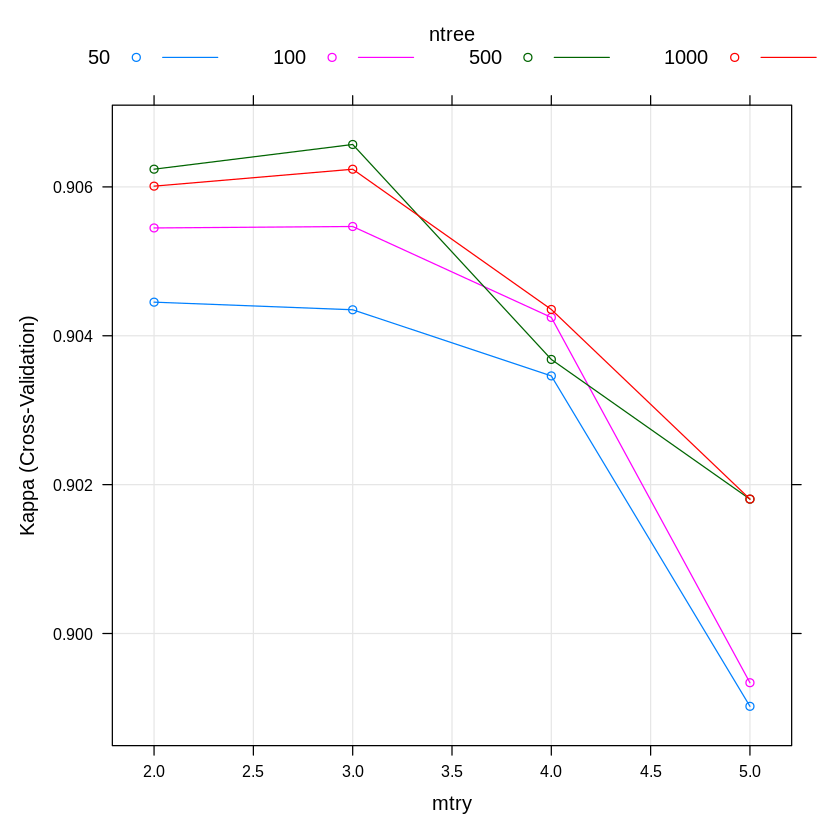

In [ ]:
plot(randomForestModel)

### Guardar modelo

In [ ]:
filename <- 'Modelos/RandomForestModel.rds'
saveRDS(randomForestModel, file = filename)
drive_upload(filename, path = paste0('AprendizajeAutomatico/ModelosGenerados/', basename(file_path_sans_ext(filename)), format(Sys.time(),'%Y_%m_%dT%H%M'), '.rds'), overwrite = T)

Local file:

• Modelos/RandomForestModel.rds

Uploaded into Drive file:

• RandomForestModel2022_03_22T1948.rds <id: 1aNN6OWI1wbkw5x4SM7xCco0pNDFId6ux>

With MIME type:

• application/x-gzip



## Adaboost
----

### Cargar modelo

In [26]:
dir <- 'AprendizajeAutomatico/ModelosGenerados/adaboostModel2022_03_23T0121.rds'
drive_download(
  dir,
  path = paste0('Modelos/', basename(dir)),
  overwrite = TRUE
)
adaboostModel <- readRDS(file = paste0('Modelos/', basename(dir)))

File downloaded:

• adaboostModel2022_03_23T0121.rds <id: 1H4Nnb5daVF-adrM6DTZzfyB4cROmQqfH>

Saved locally as:

• Modelos/adaboostModel2022_03_23T0121.rds



### Creación del modelo

In [18]:
tic('Tiempo de entrenamiento')
control <- trainControl(method="cv", 
                        number=10,
                        allowParallel = TRUE)

tunegrid <- expand.grid(.mfinal=c(25,50,100,1000),.maxdepth=1,.coeflearn = c('Breiman', 'Zhu'))

set.seed(123)

adaboostModel <- caret::train(Class~., data=training, 
                method='AdaBoost.M1', 
                metric='Kappa', 
                tuneGrid=tunegrid, 
                trControl=control)
toc()
adaboostModel

Tiempo de entrenamiento: 1333.575 sec elapsed


AdaBoost.M1 

10891 samples
    5 predictor
    7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9803, 9801, 9800, 9803, 9802, 9803, ... 
Resampling results across tuning parameters:

  coeflearn  mfinal  Accuracy   Kappa    
  Breiman      50    0.3951883  0.2225627
  Breiman     100    0.3950964  0.2224508
  Breiman     500    0.3951881  0.2225626
  Breiman    1000    0.3950963  0.2224506
  Zhu          50    0.8490401  0.8172220
  Zhu         100    0.8321547  0.7968751
  Zhu         500    0.8078130  0.7671826
  Zhu        1000    0.7819193  0.7359073

Tuning parameter 'maxdepth' was held constant at a value of 1
Kappa was used to select the optimal model using the largest value.
The final values used for the model were mfinal = 50, maxdepth = 1
 and coeflearn = Zhu.

### Metricas

In [29]:
predictions<- predict(adaboostModel,testing)
adaboost_metrics <- cbind(testing,predictions)
adaboost_metrics

,PC1,PC2,PC3,PC4,PC5,Class,predictions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
2,-5.436792,2.9323648,-2.18237398,-0.43195954,-1.226464167,SEKER,SEKER
3,-4.758088,1.8268838,-0.51403760,-0.12585380,-0.131505543,SEKER,SEKER
5,-6.349340,4.0882049,-1.17919936,-0.83035717,0.037072752,SEKER,SEKER
7,-4.518985,2.1798932,-2.01265020,-0.72437482,-1.568900484,SEKER,SEKER
9,-4.934999,2.4235560,-0.92372145,-0.39744259,-0.176273884,SEKER,SEKER
16,-5.167602,2.8015662,-0.91593964,-0.64093979,-0.046440987,SEKER,SEKER
21,-4.678022,2.1120609,-0.03364845,-0.29251275,0.481847803,SEKER,SEKER
36,-5.527483,3.4370052,-0.61465009,-0.59736563,0.141609091,SEKER,SEKER
43,-2.965450,0.2890646,-0.52319288,0.39931417,-0.276739010,SEKER,DERMASON


In [30]:
confusionMatrix<- confusionMatrix(adaboost_metrics$predictions,adaboost_metrics$Class, mode = "prec_recall")
confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      202      1   11        0     1     2    0
  BOMBAY          0    100    0        0     0     0    0
  CALI           34      3  301        0     7     0    0
  DERMASON        0      0    0      599     0     3   37
  HOROZ           9      0   10        4   372     0   29
  SEKER           6      0    0       46     0   396   43
  SIRA           13      0    4       60     5     4  418

Overall Statistics
                                       
               Accuracy : 0.8779       
                 95% CI : (0.865, 0.89)
    No Information Rate : 0.2607       
    P-Value [Acc > NIR] : < 2.2e-16    
                                       
                  Kappa : 0.8529       
                                       
 Mcnemar's Test P-Value : NA           

Statistics by Class:

                     Class: BARBUNYA Class: BOMBAY Class: CALI Class: DERMASON
P

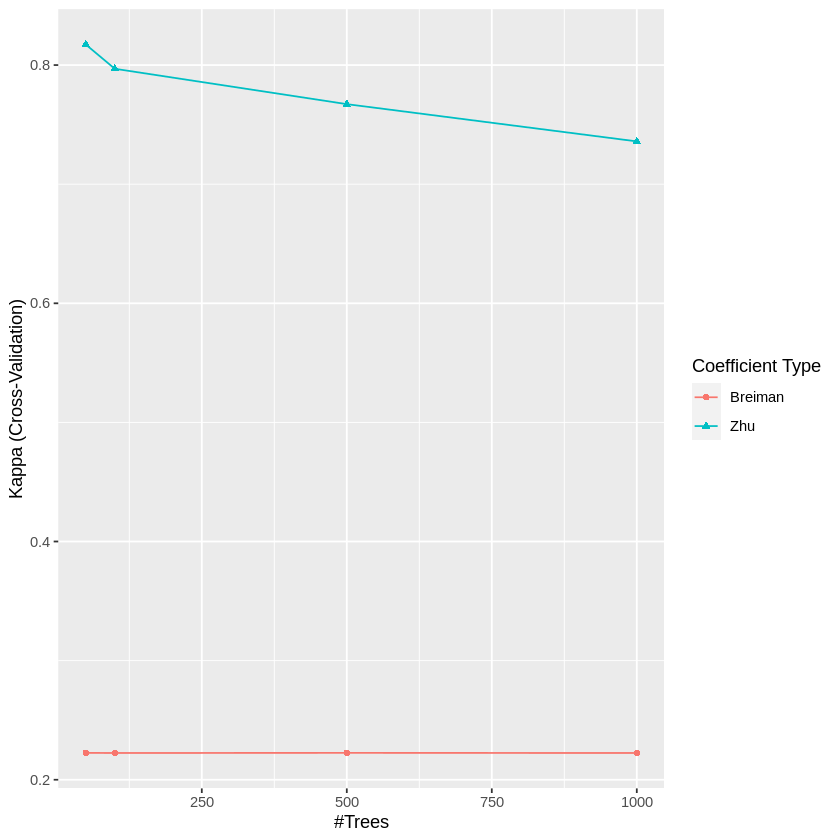

In [32]:
ggplot(adaboostModel)

### Guardar modelo

In [19]:
filename <- 'Modelos/adaboostModel.rds'
saveRDS(adaboostModel, file = filename)
drive_upload(filename, path = paste0('AprendizajeAutomatico/ModelosGenerados/', basename(file_path_sans_ext(filename)), format(Sys.time(),'%Y_%m_%dT%H%M'), '.rds'), overwrite = T)

Local file:

• Modelos/adaboostModel.rds

Uploaded into Drive file:

• adaboostModel2022_03_23T0121.rds <id: 1H4Nnb5daVF-adrM6DTZzfyB4cROmQqfH>

With MIME type:

• application/x-gzip



## Gradient Boost

### Cargar modelo

In [ ]:
dir <- 'AprendizajeAutomatico/ModelosGenerados/gradientboostModel2022_03_23T0227.rds'
drive_download(
  dir,
  path = paste0('Modelos/', basename(dir)),
  overwrite = TRUE
)
gradientboostModel <- readRDS(file = paste0('Modelos/', basename(dir)))

### Creación del modelo

In [17]:
control <- trainControl(method="cv", 
                        number=10,
                        allowParallel = TRUE)

gbmGrid <-  expand.grid(interaction.depth = c(2,5,10), 
                        n.trees = c(50,100,200), 
                        shrinkage = c(0.1, 0.01, 0.001),
                        n.minobsinnode = 10)

set.seed(123)
gradientboostModel <- caret::train(Class ~ ., data = training, 
                 method = "gbm", 
                 trControl = control, 
                 verbose = FALSE,
                 tuneGrid = gbmGrid)
gradientboostModel

Warning message:
“predictions failed for Fold01: shrinkage=0.100, interaction.depth=10, n.minobsinnode=10, n.trees=200 Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'x' in selecting a method for function 't': invalid subscript type 'list'
”
Warning message:
“predictions failed for Fold06: shrinkage=0.100, interaction.depth= 2, n.minobsinnode=10, n.trees=200 Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'x' in selecting a method for function 't': invalid subscript type 'list'
”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Stochastic Gradient Boosting 

10891 samples
    5 predictor
    7 classes: 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9803, 9801, 9800, 9803, 9802, 9803, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy   Kappa    
  0.001       2                  50      0.8604392  0.8304687
  0.001       2                 100      0.8620010  0.8324260
  0.001       2                 200      0.8653068  0.8364694
  0.001       5                  50      0.8951453  0.8731408
  0.001       5                 100      0.8950539  0.8730356
  0.001       5                 200      0.8956046  0.8737023
  0.001      10                  50      0.9045104  0.8844297
  0.001      10                 100      0.9051531  0.8852096
  0.001      10                 200      0.9063466  0.8866639
  0.010       2                  50      0.8720077  0.8447555
  0.

### Metricas

In [19]:
predictions<- predict(gradientboostModel,testing)
gradientboost_metrics <- cbind(testing,predictions)
gradientboost_metrics

,PC1,PC2,PC3,PC4,PC5,Class,predictions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
2,-5.436792,2.9323648,-2.18237398,-0.43195954,-1.226464167,SEKER,SEKER
3,-4.758088,1.8268838,-0.51403760,-0.12585380,-0.131505543,SEKER,SEKER
5,-6.349340,4.0882049,-1.17919936,-0.83035717,0.037072752,SEKER,SEKER
7,-4.518985,2.1798932,-2.01265020,-0.72437482,-1.568900484,SEKER,SEKER
9,-4.934999,2.4235560,-0.92372145,-0.39744259,-0.176273884,SEKER,SEKER
16,-5.167602,2.8015662,-0.91593964,-0.64093979,-0.046440987,SEKER,SEKER
21,-4.678022,2.1120609,-0.03364845,-0.29251275,0.481847803,SEKER,SEKER
36,-5.527483,3.4370052,-0.61465009,-0.59736563,0.141609091,SEKER,SEKER
43,-2.965450,0.2890646,-0.52319288,0.39931417,-0.276739010,SEKER,DERMASON


In [20]:
confusionMatrix<- confusionMatrix(gradientboost_metrics$predictions,gradientboost_metrics$Class, mode = "prec_recall")
confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      235      1    6        0     2     1    2
  BOMBAY          0    103    0        0     0     0    0
  CALI           18      0  314        0     5     0    1
  DERMASON        0      0    0      660     1     6   51
  HOROZ           1      0    3        1   372     0   12
  SEKER           1      0    0       13     0   388    3
  SIRA            9      0    3       35     5    10  458

Overall Statistics
                                          
               Accuracy : 0.9301          
                 95% CI : (0.9199, 0.9394)
    No Information Rate : 0.2607          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9155          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: BARBUNYA Class: BOMBAY Cl

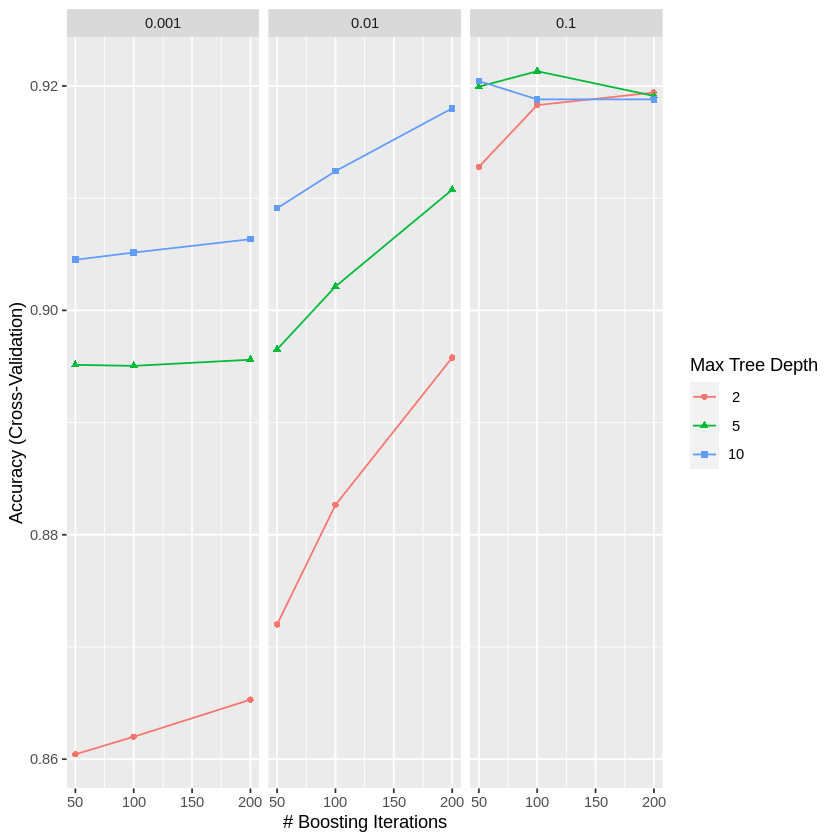

In [25]:
ggplot(gradientboostModel)

### Guardar Modelo

In [18]:
filename <- 'Modelos/gradientboostModel.rds'
saveRDS(gradientboostModel, file = filename)
drive_upload(filename, path = paste0('AprendizajeAutomatico/ModelosGenerados/', basename(file_path_sans_ext(filename)), format(Sys.time(),'%Y_%m_%dT%H%M'), '.rds'), overwrite = T)

Local file:

• Modelos/gradientboostModel.rds

Uploaded into Drive file:

• gradientboostModel2022_03_23T0227.rds <id: 1WeFEMDEqqvgVHg7WK5Gz9jW6mE3BE9sj>

With MIME type:

• application/x-gzip



## XGBoost

### Cargar modelo

In [ ]:
dir <- 'AprendizajeAutomatico/ModelosGenerados/gradientboostModel2022_03_23T0227.rds'
drive_download(
  dir,
  path = paste0('Modelos/', basename(dir)),
  overwrite = TRUE
)
xgboostModel <- readRDS(file = paste0('Modelos/', basename(dir)))

### Creación del modelo

In [17]:
#train.mat <- 
#  training %>% 
#  select(-Class) %>% 
#  as.matrix() %>% 
#  xgb.DMatrix(data = ., label = as.factor(training$Class))

#testing.mat <- 
#  testing %>% 
#  select(-Class) %>% 
#  as.matrix() %>% 
#  xgb.DMatrix(data = ., label = as.factor(testing$Class))

control <- trainControl(method="cv", 
                        number=10,
                        allowParallel = TRUE,
                        verboseIter = TRUE)

xgbgrid <-  expand.grid(
                        nrounds = c(50,100,500),
                        max_depth = c(2,6,10),
                        eta=c(0.3, 0.1, 0.01),
                        gamma = c(0.1,1,3),
                        colsample_bytree=0.5,
                        min_child_weight=c(0.5,1),
                        subsample=0.5
                        )
set.seed(123)
xgboostModel <- caret::train(x = as.matrix(training[,-6]), 
                 y = as.matrix(as.factor(training$Class)),
                 method = "xgbTree", 
                 trControl = control, 
                 verbose = FALSE,
                 metric = 'Kappa',
                 tuneGrid = xgbgrid)
xgboostModel

### Metricas

In [ ]:
predictions<- predict(xgboostModel,testing)
xgboost_metrics <- cbind(testing,predictions)
xgboost_metrics

In [ ]:
confusionMatrix<- confusionMatrix(xgboost_metrics$predictions,xgboost_metrics$Class, mode = "prec_recall")
confusionMatrix

In [ ]:
ggplot(xgboostModel)

### Guardar modelo

In [ ]:
filename <- 'Modelos/xgboostModel.rds'
saveRDS(xgboostModel, file = filename)
drive_upload(filename, path = paste0('AprendizajeAutomatico/ModelosGenerados/', basename(file_path_sans_ext(filename)), format(Sys.time(),'%Y_%m_%dT%H%M'), '.rds'), overwrite = T)